In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
data = pd.read_csv('votes.csv')
data.head()

,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,X1892,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,NaN,NaN,NaN,51.44,53.19,40.02,36.98,38.44,32.28,3.95,...,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.94,34.1,45.3,58.1,62.91
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.01,40.90,43.82,58.35,60.99,55.52,50.4,54.8,64.7,58.62
3,NaN,NaN,NaN,53.73,52.17,39.88,39.55,40.50,38.07,32.01,...,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
4,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,43.76,...,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89


In [3]:
data_without_nan = data.fillna(data.mean())
# data_without_nan = data.apply(lambda row: row.fillna(row.mean()), axis=1)

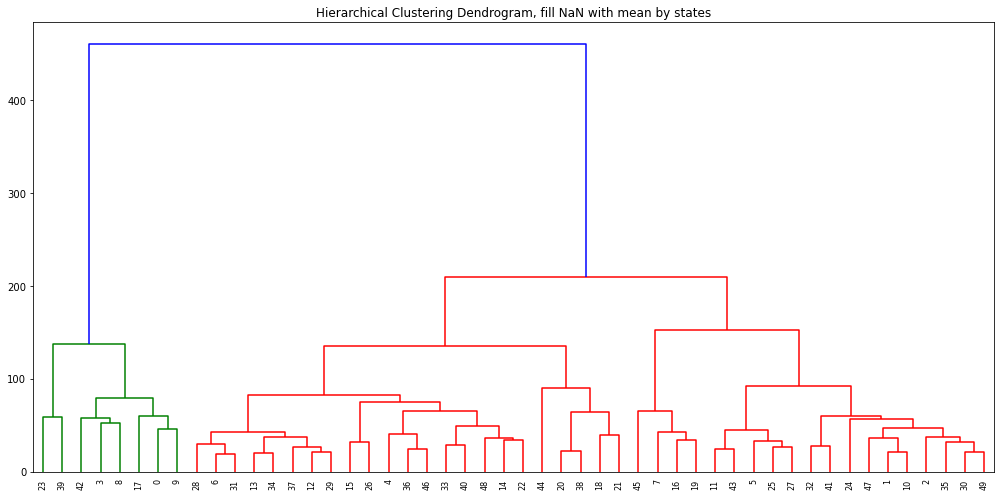

In [4]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = data_without_nan


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(14, 7))
plt.title('Hierarchical Clustering Dendrogram, fill NaN with mean by states')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10)
plt.tight_layout()

In [7]:
data_without_nan.head()

,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,X1892,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,39.4685,44.588261,57.8808,51.44000,53.190000,40.020000,36.980000,38.44,32.280000,3.950000,...,14.340000,18.200000,19.040000,35.02000,39.39000,41.75,69.5,14.0,72.4,43.48
1,39.4685,44.588261,57.8808,54.13697,57.146216,48.493784,47.911316,47.97,46.578947,41.046429,...,40.379375,42.669375,41.900417,55.76375,56.13375,50.94,34.1,45.3,58.1,62.91
2,39.4685,44.588261,57.8808,54.13697,57.146216,48.493784,47.911316,47.97,46.578947,41.046429,...,36.010000,40.900000,43.820000,58.35000,60.99000,55.52,50.4,54.8,64.7,58.62
3,39.4685,44.588261,57.8808,53.73000,52.170000,39.880000,39.550000,40.50,38.070000,32.010000,...,20.870000,29.840000,21.020000,43.76000,45.82000,43.06,43.9,30.8,68.9,34.97
4,18.7700,32.960000,58.6300,50.24000,56.380000,50.880000,48.920000,52.08,49.950000,43.760000,...,41.350000,42.990000,47.140000,56.39000,55.40000,50.10,40.9,47.8,55.0,50.89


In [6]:
from scipy.spatial import distance
dst = distance.euclidean(data_without_nan.iloc[0], data_without_nan.iloc[6])
dst

138.66184399247268